# 선형 회귀

선형 회귀를 해결하기 위한 알고리즘은 매우 많다.

경사 하강법, 정규 방정식, 결정 트리, 서포트 백터 머신. 

이번에는 경사 하강법에 대해 알아보자.

## (1) 데이터 처리

In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LinearLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

class MyData:
    def __init__(self):
        self.file_clean = "./data/point_clean.csv"
        self.file_noisy = "./data/point_noisy.csv"
    
    def get_data_clean(self):
        dc = np.genfromtxt(self.file_clean, delimiter = ',')
        return dc

    def get_data_noisy(self):
        dn = np.genfromtxt(self.file_noisy, delimiter = ',')
        return dn
    
    def get_grid(self, data):
        data = data.reshape(-1, 1)
        size = int(data.shape[0] ** (1/2))
        grid_data = data.reshape(size, size)
        return grid_data

## (2) 데이터 시각화

(400,) (400,) (400,)
(400,) (400,) (400,)


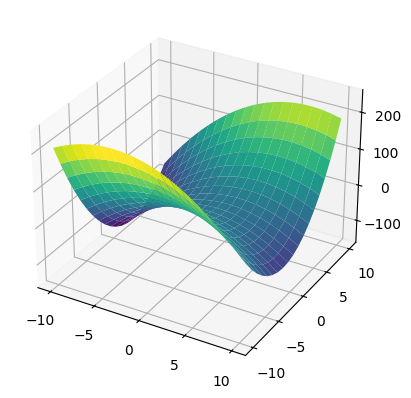

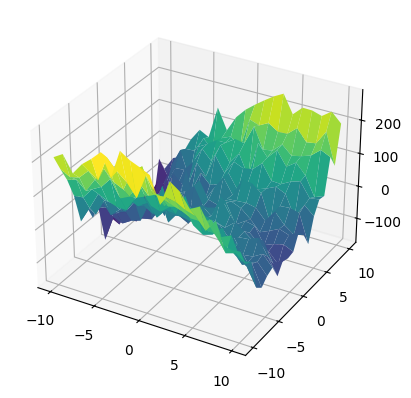

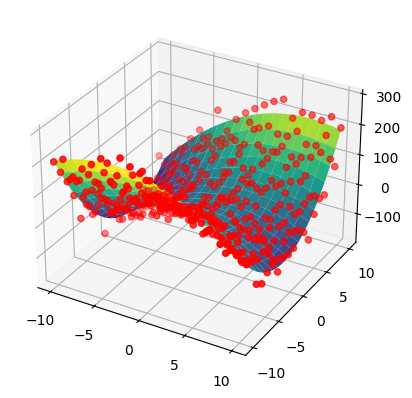

In [9]:
class MyPlot:
    def __init__(self):
        self.fig_size = (8,8)
    
    def plot_data(self, x, y, z):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(x, y, z, cmap = 'viridis')
    
    def plot_data_point(self, x, y, z, x_point, y_point, z_point):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(x, y, z, cmap = 'viridis')
        ax.scatter(x_point, y_point, z_point, color = 'r')
    
    def plot_loss(self, loss):
        plt.figure(figsize = self.fig_size)
        plt.plot(loss, 'r')
        plt.xlabel('iteration')
        plt.ylabel('loss')
        plt.show()

plot = MyPlot()
data = MyData()

data_clean = data.get_data_clean()
data_noisy = data.get_data_noisy()
x_clean = data_clean[0]
y_clean = data_clean[1]
z_clean = data_clean[2]

x_noisy = data_noisy[0]
y_noisy = data_noisy[1]
z_noisy = data_noisy[2]

grid_x_clean = data.get_grid(x_clean)
grid_y_clean = data.get_grid(y_clean)
grid_z_clean = data.get_grid(z_clean)

grid_x_noisy = data.get_grid(x_noisy)
grid_y_noisy = data.get_grid(y_noisy)
grid_z_noisy = data.get_grid(z_noisy)

print(x_clean.shape, y_clean.shape, z_clean.shape)
print(x_noisy.shape, y_noisy.shape, z_noisy.shape)
plot.plot_data(grid_x_clean, grid_y_clean, grid_z_clean)
plot.plot_data(grid_x_noisy, grid_y_noisy, grid_z_noisy)
plot.plot_data_point(grid_x_clean, grid_y_clean, grid_z_clean, x_noisy, y_noisy, z_noisy)

(3) 학습과정은 z_hat 계산 - z - z_hat 계산 - loss 미분 최소가되는 방향 - 갱신 갱신된걸로 다시 z_hat 계산

In [13]:
class MyModel:
    def __init__(self, lr = 0.0001):
        self.lr = lr
        self.w = np.random.randn(6, 1)
        self.b = np.zeros((6, 1))
        
    
    def get_feature(self, x, y):
        x.reshape(-1,1)
        y.reshape(-1,1)
        feature = np.column_stack((np.ones((x.shape[0], 1)),x, y, x**2, x*y, y**2))
        return feature
    
    def predict(self, feature):
        z_hat = feature @ self.w
        return z_hat.reshape(-1,1)
    
    def get_loss(self, z, z_hat):
        z.reshape(-1,1)
        loss = (1 / (z.shape[0])) * ((z - z_hat).T @ (z - z_hat))
        return loss
    
    def get_gradient(self, feature, z_hat, z):
        error = z_hat - z
        grad = (1 / z.shape[0]) * (feature.T @ error)
        return grad

    
    def update_weight(self, grad):
        self.w -= self.lr * grad


loss: [[32216.07436615]]
loss: [[2332.13355185]]
loss: [[976.65129651]]
loss: [[806.80146068]]
loss: [[740.27686848]]
loss: [[686.73080215]]
loss: [[637.77940397]]
loss: [[592.38845682]]
loss: [[550.23529104]]
loss: [[511.0825793]]


/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2392/4244650311.py:15: RuntimeWarning: divide by zero encountered in matmul
  z_hat = feature @ self.w
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2392/4244650311.py:15: RuntimeWarning: overflow encountered in matmul
  z_hat = feature @ self.w
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2392/4244650311.py:15: RuntimeWarning: invalid value encountered in matmul
  z_hat = feature @ self.w
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2392/2556982823.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_iteration[i] = loss


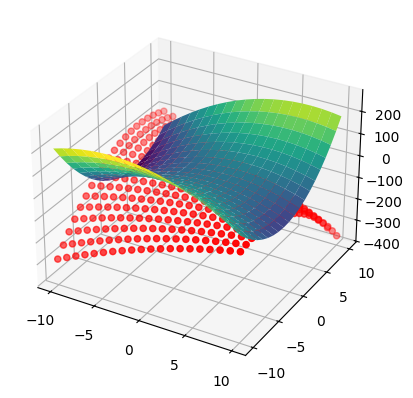

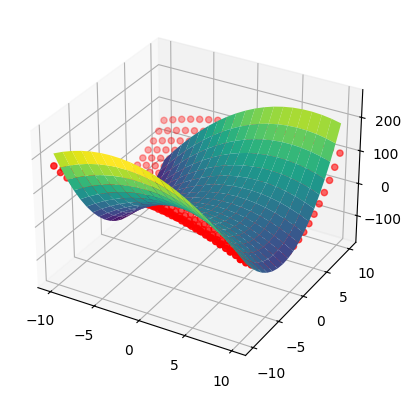

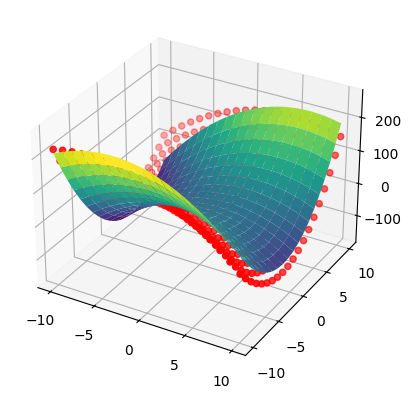

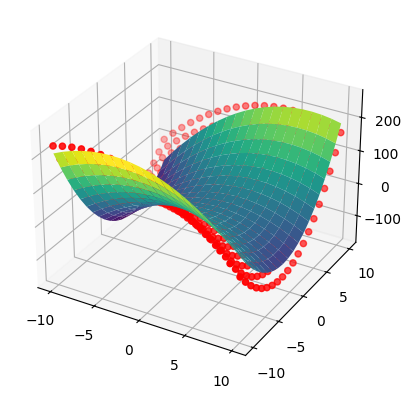

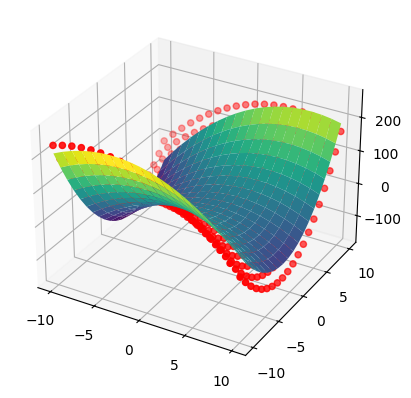

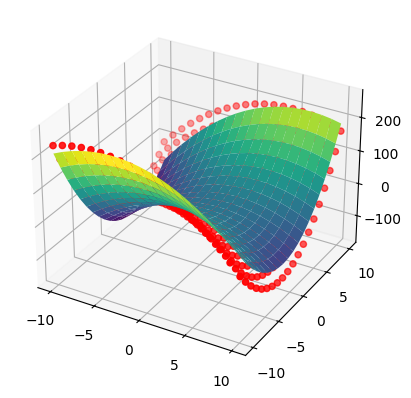

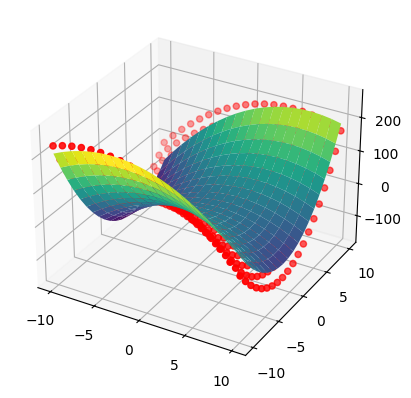

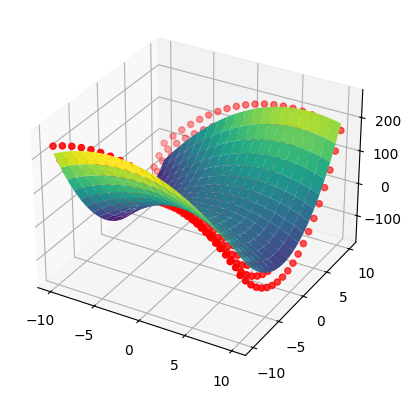

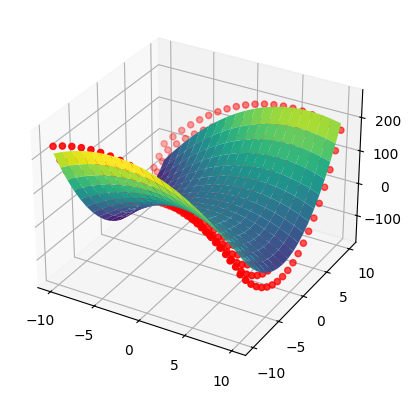

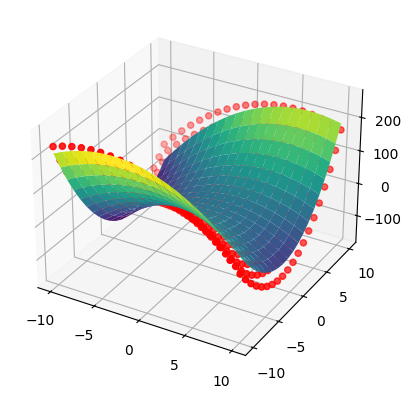

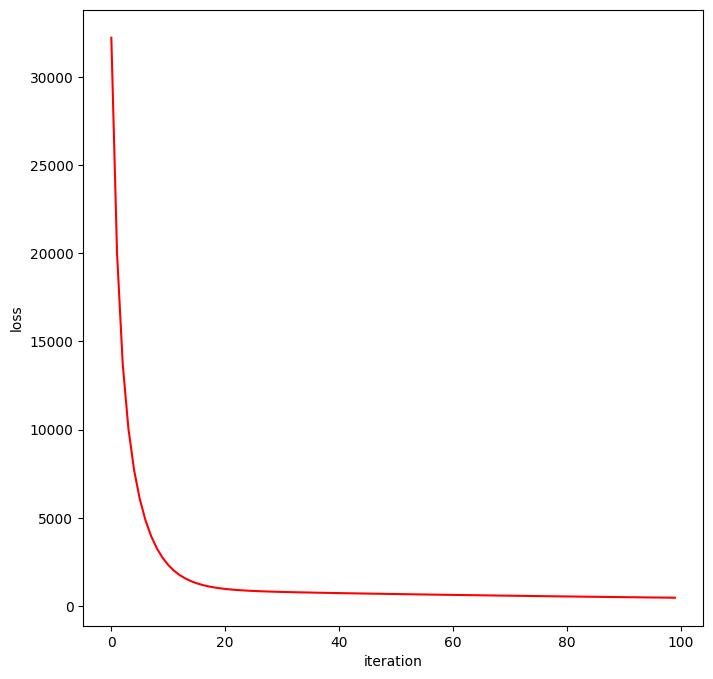

In [21]:
model = MyModel()
feature = model.get_feature(x_noisy, y_noisy)
label = z_clean.reshape(-1,1)
loss_iteration = np.zeros(100)
for i in range(100):
    z_hat = model.predict(feature)
    loss = model.get_loss(label, z_hat)
    grad = model.get_gradient(feature, z_hat, label)
    model.update_weight(grad)
    loss_iteration[i] = loss
    if (i % 10) == 0:
        z_plot = z_hat.reshape(20,20)
        plot.plot_data_point(grid_x_clean, grid_y_clean, grid_z_clean,grid_x_noisy,grid_y_noisy,z_plot)
        print(f"loss: {loss}")

plot.plot_loss(loss_iteration)
